In [152]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import gget
import utils as ut
import matplotlib.patches as mpatches

In [2]:
cardOutDir = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/CARDOuputs/"

dfList = []

for f in os.listdir(cardOutDir):
    fullPath = f"{cardOutDir}{f}"
    key = f.split("_")[0]
    df = pd.read_csv(fullPath)
    df = df.rename(columns={'Unnamed: 0' : 'spotId'})
    df['key'] = key
    dfList.append(df)
    
df = pd.concat(dfList, ignore_index=True)
print(f"{df.shape=}")
print(df['key'].value_counts())
print()
df.head()

df.shape=(6875, 9)
HFD8     3024
HFD14    1965
ND       1886
Name: key, dtype: int64



spotId  Macrophages  Monocytes   T cells  NK cells  \
0  AAACATTTCCCGGATT.1     0.274773   0.091945  0.058329  0.053970   
1  AAACCGGGTAGGTACC.1     0.539780   0.173177  0.035832  0.019209   
2  AAACCGTTCGTCCAGG.1     0.239674   0.228936  0.061641  0.111439   
3  AAACCTAAGCAGCCGG.1     0.142151   0.159068  0.132080  0.222251   
4  AAACCTCATGAAGTTG.1     0.320613   0.192903  0.059837  0.111882   

   Dendritic cells  Stromal cells   B cells    key  
0         0.085830       0.261578  0.173576  HFD14  
1         0.083717       0.042640  0.105645  HFD14  
2         0.086732       0.132795  0.138783  HFD14  
3         0.105607       0.076357  0.162485  HFD14  
4         0.049160       0.108417  0.157187  HFD14

In [3]:
sptDir =  "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/CARDInputs/"

spt = {}

for f in os.listdir(sptDir):
    if "spt" in f:
        fullPath = f"{sptDir}{f}"
        key = f.split("_")[0]
        sdf = pd.read_csv(fullPath)
        sdf = sdf.rename(columns={'Unnamed: 0' : 'gene'})
        sdf = sdf.set_index('gene')
        sdf = sdf.T
        sdf.index = sdf.index.str.replace("-", ".")
        spt[key] = sdf
    
print('done')

done


In [4]:
coordDir = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/CARDInputs/"

dfList = []

for f in os.listdir(coordDir):
    if "coord" in f:
        fullPath = f"{coordDir}{f}"
        key = f.split("_")[0]
        cdf = pd.read_csv(fullPath)
        cdf = cdf.rename(columns={'Unnamed: 0' : 'spotId'})
        cdf['key'] = key
        dfList.append(cdf)

cdf = pd.concat(dfList, ignore_index=True)
print(f"{cdf.shape=}")
print(cdf['key'].value_counts())
print()
cdf.head()

cdf.shape=(7424, 4)
HFD8     3394
ND       2036
HFD14    1994
Name: key, dtype: int64



spotId            x            y    key
0  AAACATTTCCCGGATT.1  1139.783401  1365.804581  HFD14
1  AAACCGGGTAGGTACC.1   468.056902  1045.415505  HFD14
2  AAACCGTTCGTCCAGG.1   604.524374  1214.452428  HFD14
3  AAACCTAAGCAGCCGG.1  1003.708924  1433.743571  HFD14
4  AAACCTCATGAAGTTG.1   380.369919   960.970730  HFD14

In [5]:
"""Merge CARD predictions with spatial coordinates"""
df = pd.merge(cdf, df,
              how='left', 
              left_on=['spotId', 'key'],
              right_on=['spotId', 'key'])

df = df.fillna(0)
df.head()

spotId            x            y    key  Macrophages  \
0  AAACATTTCCCGGATT.1  1139.783401  1365.804581  HFD14     0.274773   
1  AAACCGGGTAGGTACC.1   468.056902  1045.415505  HFD14     0.539780   
2  AAACCGTTCGTCCAGG.1   604.524374  1214.452428  HFD14     0.239674   
3  AAACCTAAGCAGCCGG.1  1003.708924  1433.743571  HFD14     0.142151   
4  AAACCTCATGAAGTTG.1   380.369919   960.970730  HFD14     0.320613   

   Monocytes   T cells  NK cells  Dendritic cells  Stromal cells   B cells  
0   0.091945  0.058329  0.053970         0.085830       0.261578  0.173576  
1   0.173177  0.035832  0.019209         0.083717       0.042640  0.105645  
2   0.228936  0.061641  0.111439         0.086732       0.132795  0.138783  
3   0.159068  0.132080  0.222251         0.105607       0.076357  0.162485  
4   0.192903  0.059837  0.111882         0.049160       0.108417  0.157187

In [6]:
imDir = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/images/"

imgs = {}

for key in df['key'].unique():
    imPath = f"{imDir}{key}.npy"
    img = np.load(imPath)
    print(key, img.shape)
    imgs[key] = img

print('done')

HFD14 (2000, 1628, 3)
ND (2000, 1681, 3)
HFD8 (2000, 1692, 3)
done


In [56]:
# cTypes = [
#     'Macrophages', 
#     'Monocytes',
#     'T cells',
#     'NK cells', 
#     'Dendritic cells', 
#     'Stromal cells', 
#     'B cells'
# ]

# def vcorrcoef(X,y):
#     """Fast vector matrix correlation """
#     Xm = np.reshape(np.mean(X,axis=1),(X.shape[0],1))
#     ym = np.mean(y)
#     r_num = np.sum((X-Xm)*(y-ym),axis=1)
#     r_den = np.sqrt(np.sum((X-Xm)**2,axis=1)*np.sum((y-ym)**2))
#     r = r_num/r_den
#     return r

# corrs = {}

# keys = sorted(df['key'].unique(), reverse=True)

# for key in keys:
#     pdf = df[df['key'] == key]
    
#     sdf = spt[key]
    
#     # make sure the spot order is the same
#     assert(pdf['spotId'].to_list() == sdf.index.to_list())
    
#     rf = pd.DataFrame({'Gene' : sdf.columns})

#     for ctype in cTypes:
#         r = vcorrcoef(sdf.to_numpy().T, pdf[ctype].to_numpy().T)        
#         rf[ctype] = r
        
#     rf = rf.fillna(0)
#     corrs[key] = rf
    
# print('done')

In [55]:
# n = 100
# alpha = 0.05
# db = 'celltypes'

# res = []

# for key in keys:
#     rf = corrs[key]
    
#     for ctype in cTypes:
#         genes = rf.sort_values(by=ctype, ascending=False)['Gene'].head(n).to_list()
#         ef = gget.enrichr(genes, database=db)        
#         ef = ef[ef['p_val'] <= alpha]
        
#         # print(ctype)
#         # print(ef['path_name'].head())
#         # print()
        
#         isSig = False
        
#         if ctype.lower() in [x.lower() for x in ef['path_name'].to_list()]:
#             isSig = True
            
#         if ctype == 'Stromal cells' and 'adipocytes' in [x.lower() for x in ef['path_name'].to_list()]:
#             isSig = True
            
#         row = {
#             'key' : key,
#             'cellType' : ctype,
#             'signifcant' : isSig,
#             'nGenes' : n,
#         }
        
#         res.append(row)
            
# res = pd.DataFrame(res)

# r = pd.pivot_table(res, 
#                index='cellType', 
#                columns='key',
#                values='signifcant')
# r = r[r.columns[::-1]]

# plt.rcParams['figure.dpi'] = 300
# plt.rcParams['figure.dpi'] = 300
# sns.heatmap(data=r,
#            cmap='RdYlGn', 
#            linewidths=0.3, 
#            linecolor='k')

# plt.yticks(rotation=0)
# plt.ylabel("")
# plt.yticks(rotation=0)
# plt.xlabel("")

In [ ]:
# break

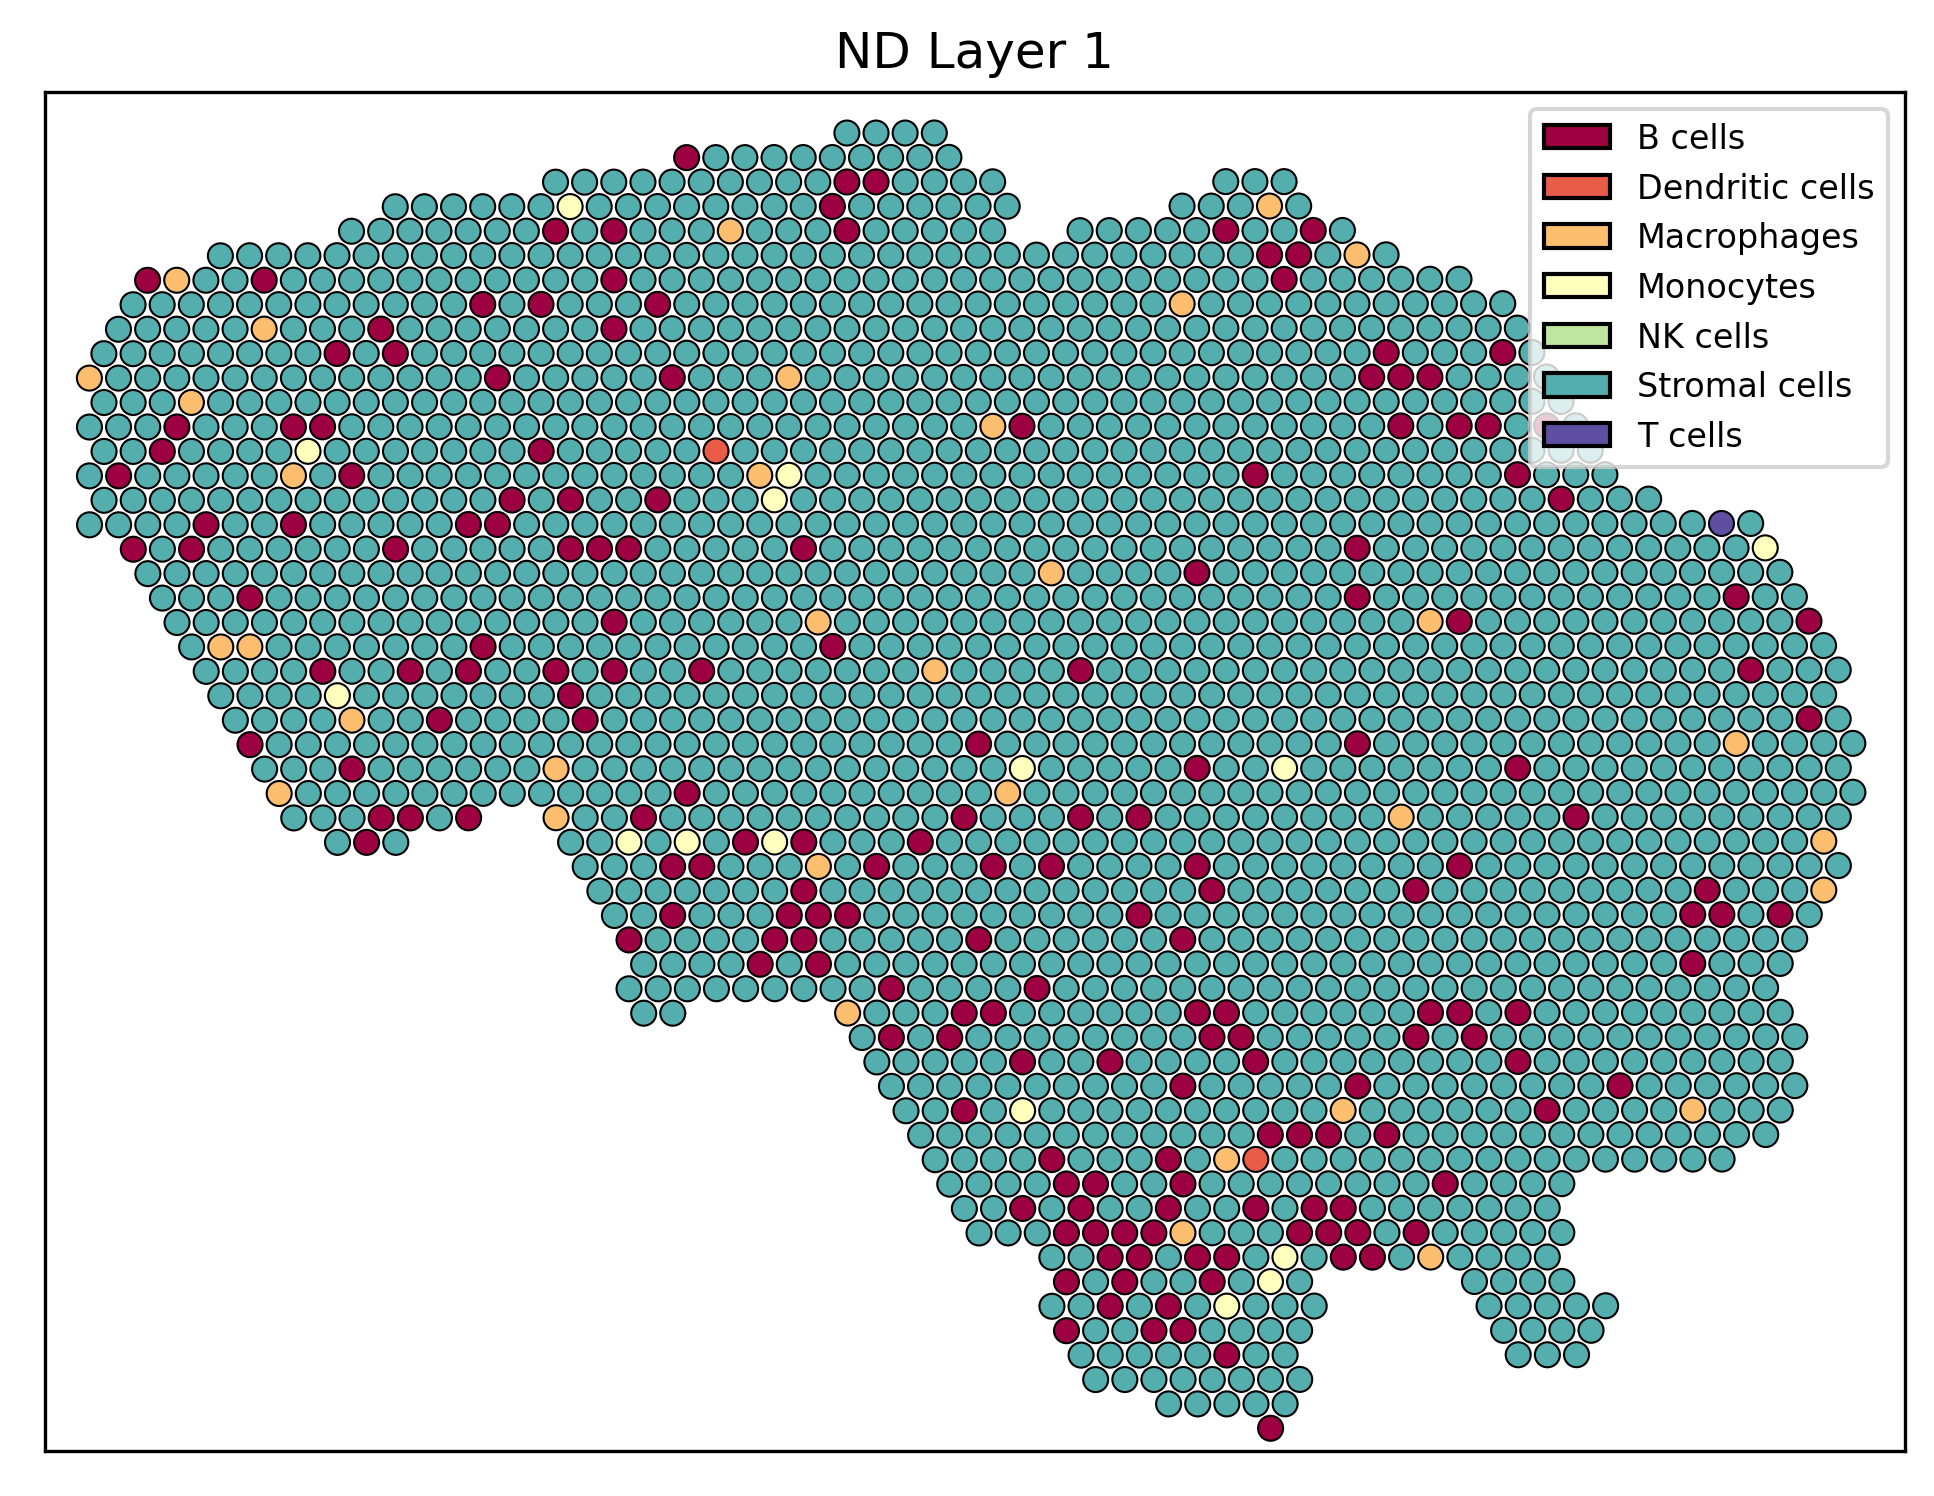

         Cell Type  Proportion
0    Stromal cells    0.881139
1          B cells    0.093320
2      Macrophages    0.016699
3        Monocytes    0.007367
4  Dendritic cells    0.000982
5          T cells    0.000491


In [172]:
cTypes = [
    'Macrophages', 
    'Monocytes',
    'T cells',
    'NK cells', 
    'Dendritic cells', 
    'Stromal cells', 
    'B cells'
]

trim = {
    'ND' : {'xlim' :  [220, 1500], 'ylim' : [1600, 630]},
    'HFD8' : {'xlim' :  [190, 1350], 'ylim' : [1680, 400]},
    'HFD14' : {'xlim' :  [250, 1400], 'ylim' : [1650, 450]},
}

layer = 1

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.facecolor'] = "w"
plt.rcParams['figure.figsize'] = 8,6

colors = ut.ncolor(len(cTypes), cmap='Spectral')
colorDict = dict(zip(sorted(cTypes), colors))



for key in sorted(df['key'].unique(), reverse=True):
    pdf = df[df['key'] == key]
    pdf = pdf.set_index('spotId')
    img = imgs[key]
    
    pdf['cType'] = pdf[cTypes].apply(lambda x: cTypes[np.argsort(x)[-layer]], axis=1)
    pdf['color'] = pdf['cType'].map(colorDict) 
    
    handles = []
    
    for ctype in sorted(cTypes):
        handle = mpatches.Patch(color=colorDict[ctype], 
                                ec='k', 
                                label=ctype)
        handles.append(handle)
    
    plt.scatter(pdf['x'],
                pdf['y'],
                c=pdf['color'],
                ec='k',
                linewidth=0.5)
    
#     plt.imshow(img, 
#                cmap='binary')
    
    _ = plt.xticks([])
    _ = plt.yticks([])
    plt.title(f'{key} Layer {layer}')
    ax = plt.gca()
    xlim = trim[key]['xlim']
    ylim = trim[key]['ylim']
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.legend(handles=handles, loc='upper right', prop={'size': 8})
    plt.show()
    
    break


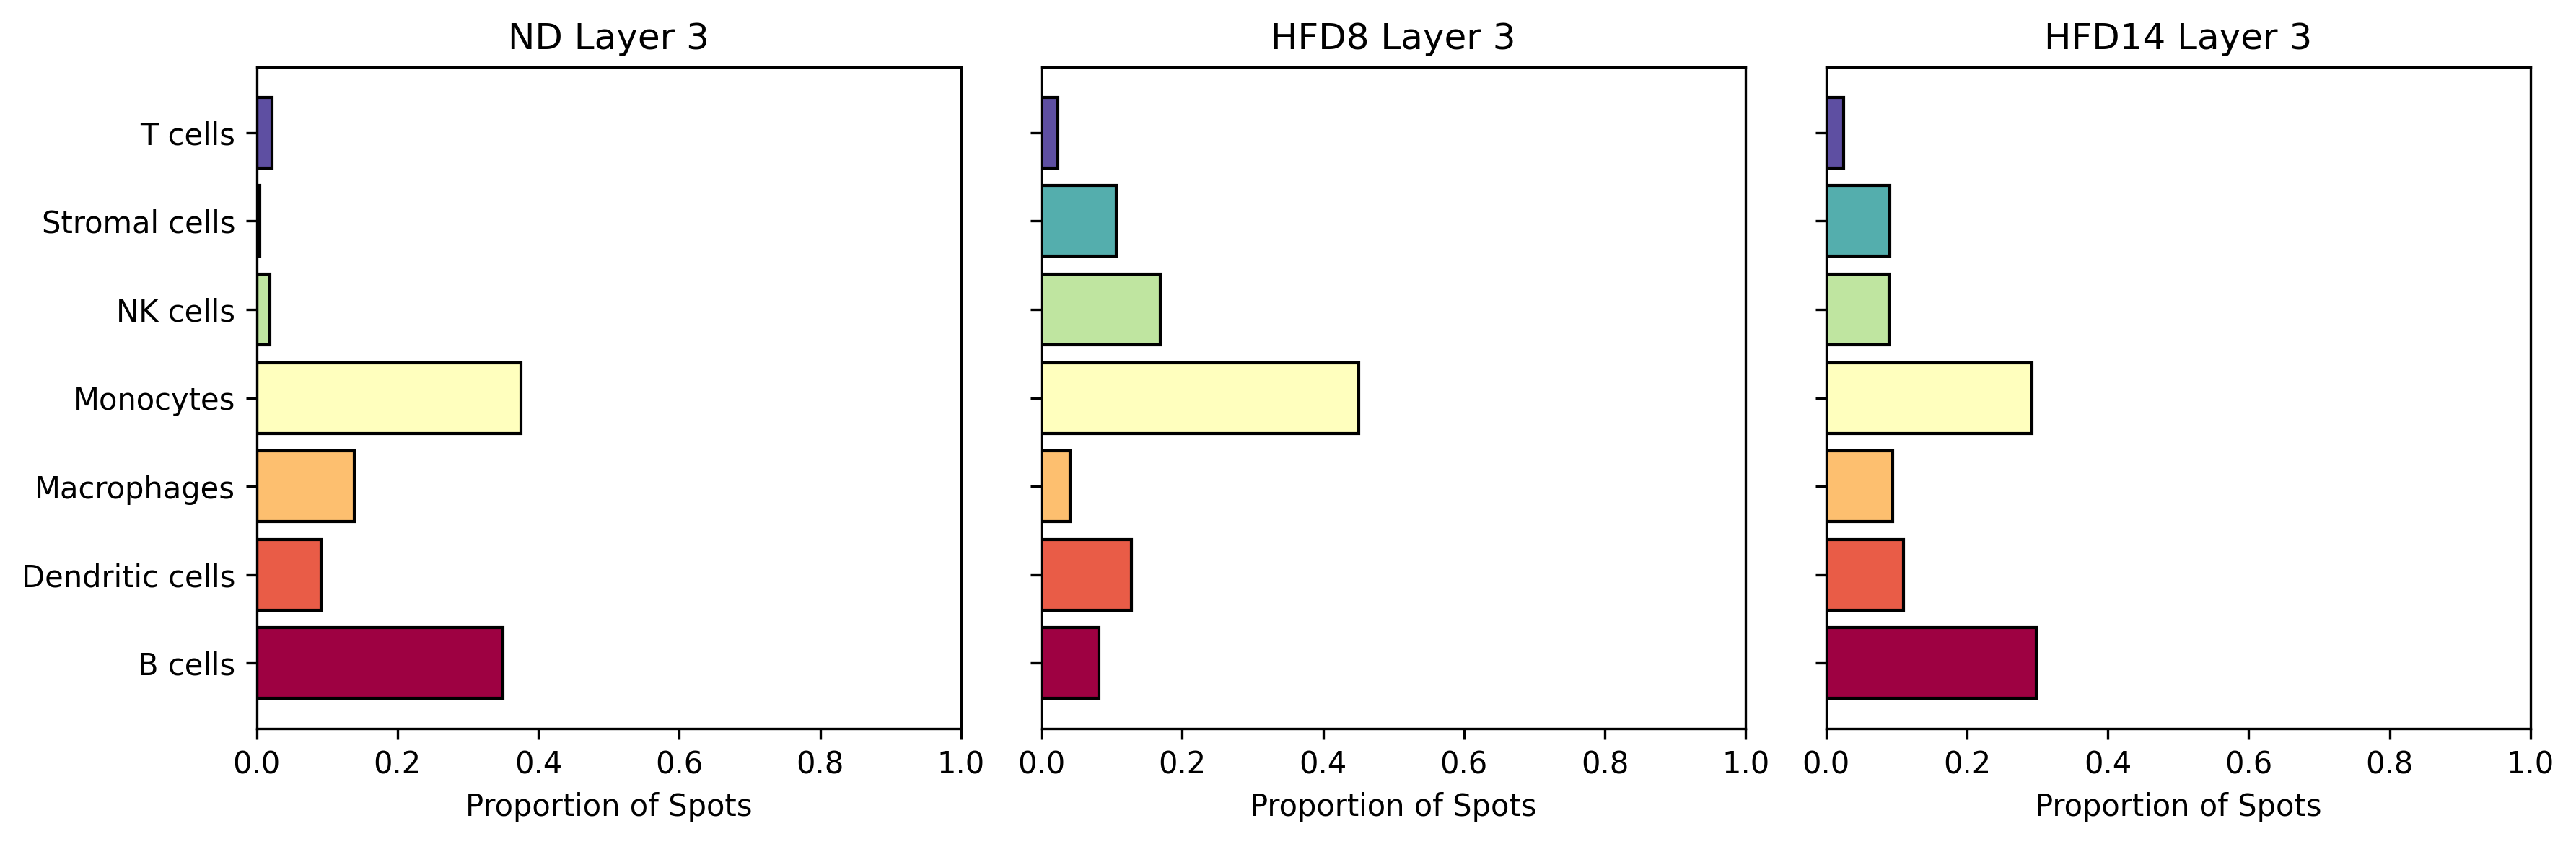

In [210]:
layer = 3

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.facecolor'] = "w"
plt.rcParams['figure.figsize'] = 12, 4

colors = ut.ncolor(len(cTypes), cmap='Spectral')
colorDict = dict(zip(sorted(cTypes), colors))

fig, axs = plt.subplots(1, 3, sharey=True)

for i, key in enumerate(sorted(df['key'].unique(), reverse=True)):
    pdf = df[df['key'] == key]
    pdf = pdf.set_index('spotId')
    img = imgs[key]
    
    pdf['cType'] = pdf[cTypes].apply(lambda x: cTypes[np.argsort(x)[-layer]], axis=1)
    
    props = pd.DataFrame(pdf['cType'].value_counts(normalize=True).reset_index())
    props.columns = ['cellType', 'proportion']
    props['color'] = props['cellType'].map(colorDict) 
    props = props.sort_values(by='cellType')
    
    axs[i].barh(props['cellType'],
                props['proportion'],
                color=props['color'],
                edgecolor='k')
    
    axs[i].set_xlabel('Proportion of Spots')
    axs[i].set_title(f"{key} Layer {layer}")
    axs[i].set_xlim([0, 1])
    # break
plt.tight_layout()

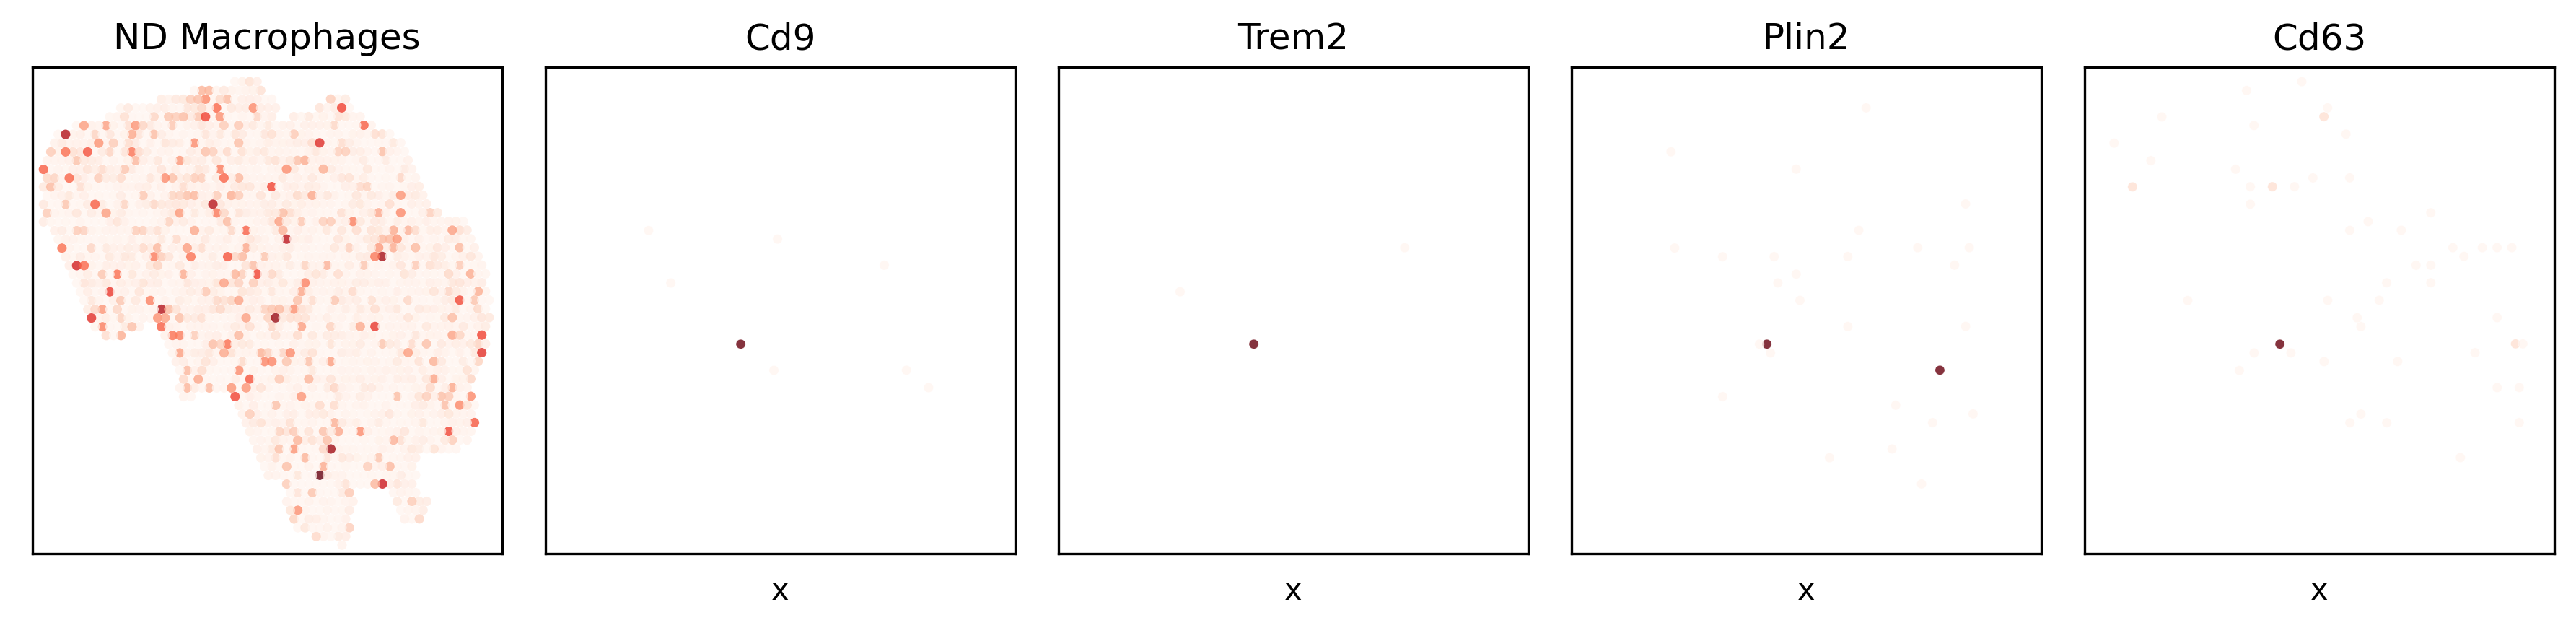

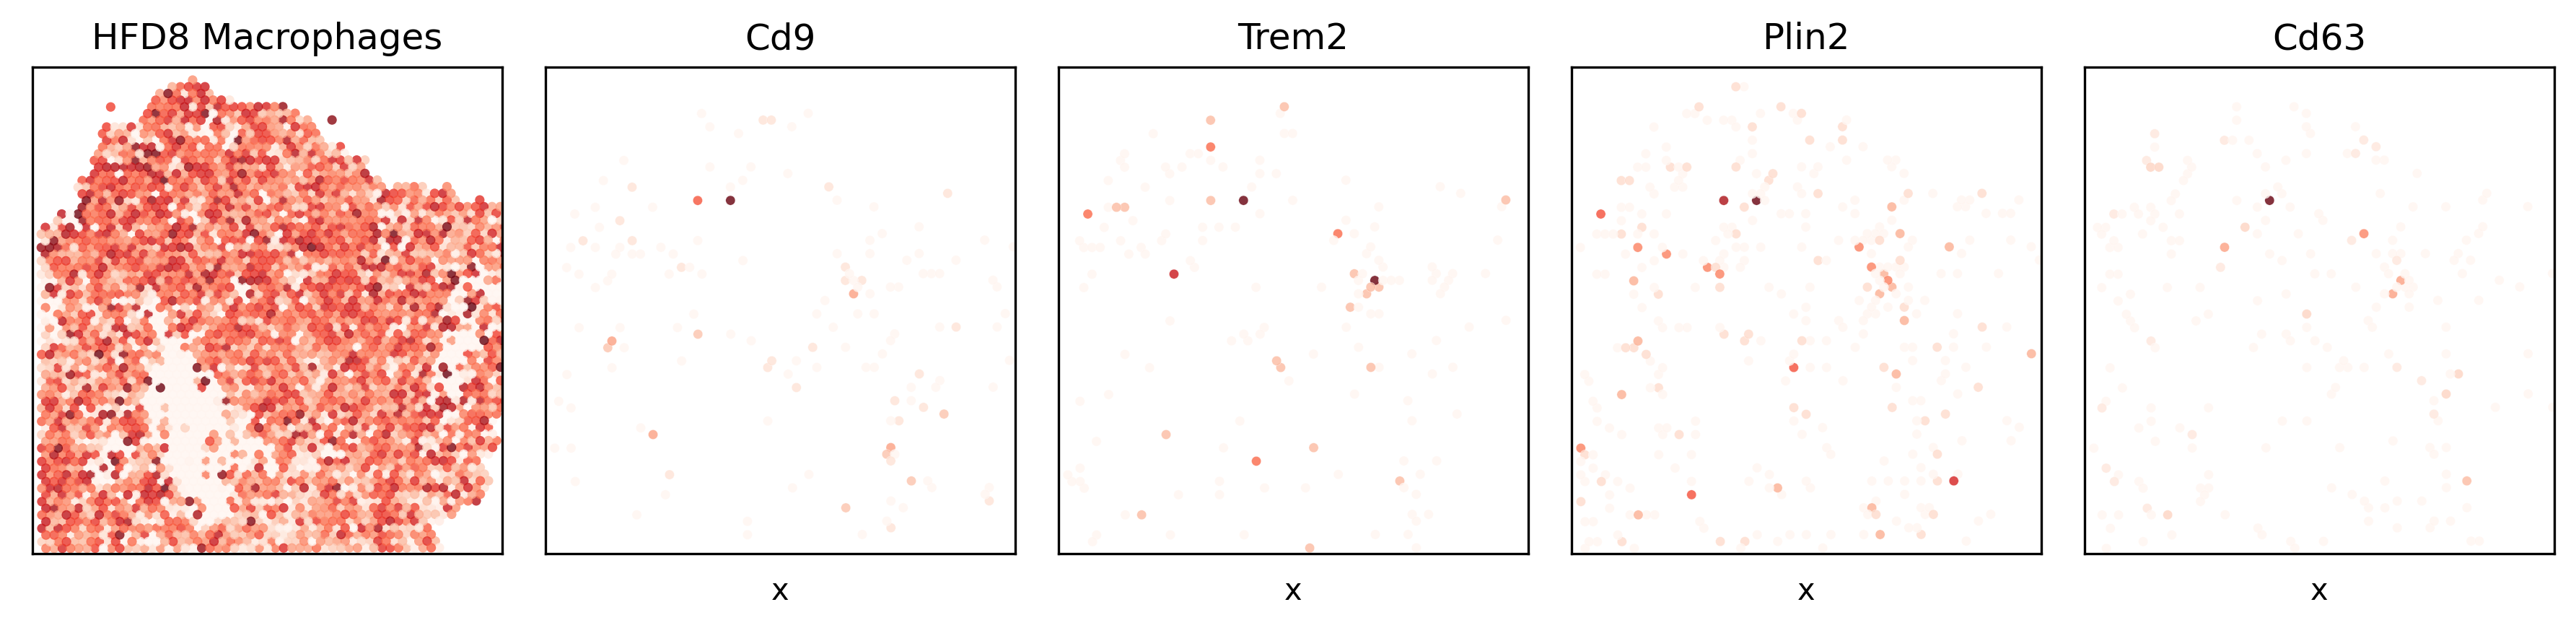

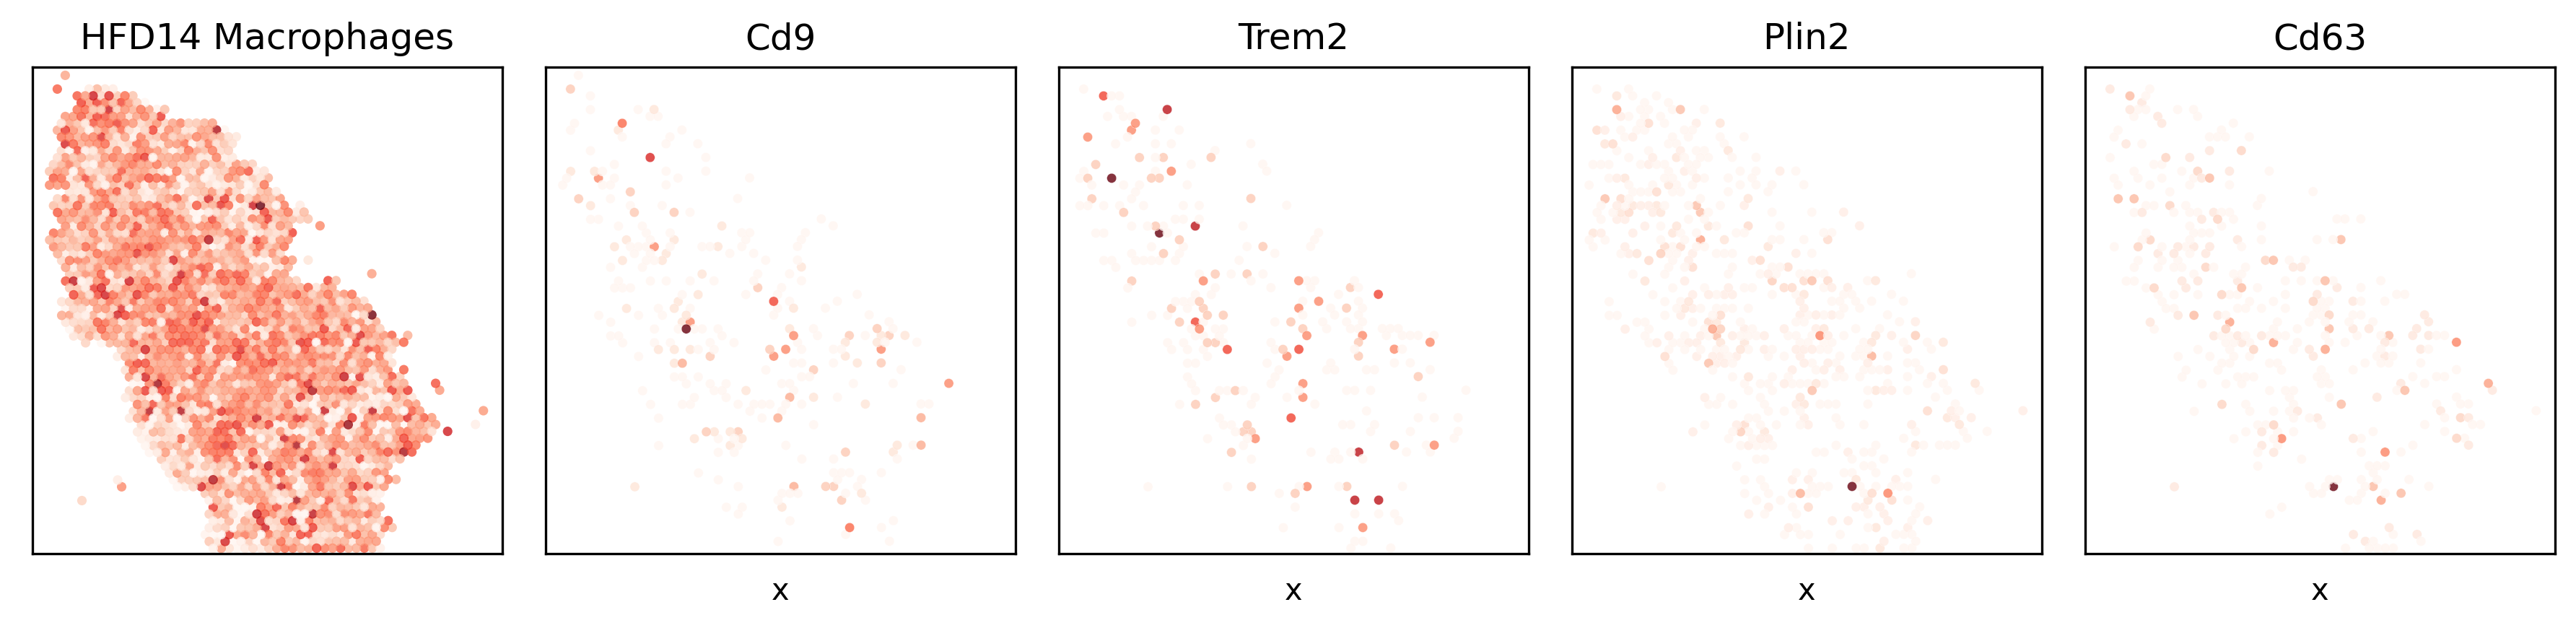

In [209]:
cellType = "Macrophages"
cmap = 'Reds'
query = ['CD9', 'TREM2', 'PLIN2', 'CD63']

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.facecolor'] = "w"
plt.rcParams['figure.figsize'] = 12, 3

for key in sorted(df['key'].unique(), reverse=True):
    pdf = df[df['key'] == key]
    pdf = pdf.set_index('spotId')
    img = imgs[key]
    sdf = spt[key]
    
    fig, axs = plt.subplots(1, len(query)+1, sharey=True)
    axs = axs.ravel()

    sns.scatterplot(data=pdf,
                    x='x',
                    y='y',
                    hue=cellType,
                    palette=cmap,
                    linewidth=0,
                    alpha=0.8,
                    zorder=2,
                    legend=False,
                    s=10,
                    ax=axs[0])

    # axs[0].imshow(img, 
    #               cmap='binary',
    #               zorder=1)
    """build color bar"""
    norm = plt.Normalize(pdf[cellType].min(), 
                         pdf[cellType].max())

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    axs[0].set_xlabel("")
    axs[0].set_ylabel("")
    _ = axs[0].set_xticks([])
    _ = axs[0].set_yticks([])
    
    xlim = trim[key]['xlim']
    ylim = trim[key]['ylim']
    axs[0].set_xlim(xlim)
    axs[0].set_ylim(ylim)
    axs[0].set_title(f"{key} {cellType}")
    # axs[0].colorbar(sm)
    
    
    for i, q in enumerate(query):
        pi = i + 1
        mask = sdf[q.upper()] > 0
        plotdf = pdf[mask]
        color = sdf[mask][q.upper()]
        
        sns.scatterplot(data=plotdf,
                x='x',
                y='y',
                # hue=color,
                hue=color, 
                # ec='k',     
                palette=cmap,
                linewidth=0.1,
                alpha=0.8,
                legend=False,
                zorder=2,
                s=10,
                ax=axs[pi])
        
        # axs[pi].imshow(img, 
        #                cmap='binary',
        #                zorder=1)
        axs[pi].set_xlim(xlim)
        axs[pi].set_ylim(ylim)
        axs[pi].set_title(str(q).lower().capitalize())
        _ = axs[pi].set_xticks([])
        _ = axs[pi].set_yticks([])

    plt.tight_layout()
    plt.show()
    # break